In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('data/train_features.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test = pd.read_csv('data/test_features.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [4]:
# id 별로 600개의 data 가 있음
train['id'].value_counts()

2047    600
1347    600
2378    600
1354    600
2379    600
       ... 
1699    600
675     600
2722    600
1698    600
0       600
Name: id, Length: 3125, dtype: int64

In [5]:
# train_labels.csv에서 id가 수행한 동작과 그에 따른 label 값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


<AxesSubplot:>

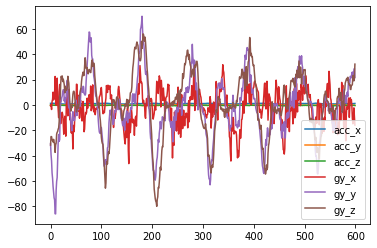

In [7]:
# id 별 동작 흐름
ex = train[train['id'] == 0]
ex.iloc[:,2:].plot()

<AxesSubplot:>

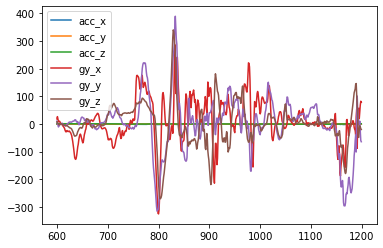

In [8]:
ex=train[train['id']==1]
ex.iloc[:,2:].plot()

In [9]:
#test'id'는 782개 
test['id'].nunique()

782

In [10]:
#782개의 id 별 동작 데이터를 활용해 각각의id가 어떤 동작인지를 분류하는 문제!!
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

## 데이터 전처리(reshape, one-hot encoding)

In [20]:
train.shape

(1875000, 8)

In [12]:
# id랑 time label을 없앰
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [27]:
len(train_labels['label'].unique())

61

In [28]:
# label을 one-hot encoding (61개의 unique 한 label 존재)
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

In [26]:
len(train_labels['label'].unique())

61

In [ ]:
import tensorflow as tf
#tf.__version__

import keras
keras.__version__

## 모델 학습 및 예측

In [67]:
#가벼운 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers

def deep_lstm():
    model = Sequential()
    model.add(LSTM(32, input_shape = (600,6), return_sequences = True))
    model.add(LSTM(64, return_sequences = True))
    model.add(LSTM(64, return_sequences = True))
    
    model.add(LSTM(128, return_sequences = False))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(61, activation='softmax'))
    
    #adam = optimizers.adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    return model

In [89]:
model1 = deep_lstm()
model1.fit(X,y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
79/79 [==============================] - 84s 985ms/step - loss: 3.0570 - accuracy: 0.4494 - val_loss: 2.7270 - val_accuracy: 0.4976
Epoch 2/100
79/79 [==============================] - 77s 978ms/step - loss: 2.6745 - accuracy: 0.4840 - val_loss: 2.5829 - val_accuracy: 0.5072
Epoch 3/100
79/79 [==============================] - 78s 992ms/step - loss: 2.4282 - accuracy: 0.5077 - val_loss: 2.4321 - val_accuracy: 0.5136
Epoch 4/100
79/79 [==============================] - 78s 990ms/step - loss: 2.3085 - accuracy: 0.5091 - val_loss: 2.3534 - val_accuracy: 0.5216
Epoch 5/100
79/79 [==============================] - 77s 980ms/step - loss: 2.3141 - accuracy: 0.5057 - val_loss: 2.3708 - val_accuracy: 0.5040
Epoch 6/100
79/79 [==============================] - 90s 1s/step - loss: 2.1659 - accuracy: 0.5257 - val_loss: 2.3300 - val_accuracy: 0.5200
Epoch 7/100
79/79 [==============================] - 96s 1s/step - loss: 2.1689 - accuracy: 0.5122 - val_loss: 2.4628 - val_accuracy: 0.536

KeyboardInterrupt: 

In [90]:
#model.fit(X,y, epochs=100, batch_size=32, validation_split=0.2)

## evaluate

In [91]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [96]:
prediction=model1.predict(test_X)

In [97]:
prediction.shape

(782, 61)

In [98]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.003593,0.009085,0.000203,0.000903,0.045138,0.001880,0.003678,0.008946,0.000995,...,0.012350,0.010498,0.002749,0.005569,0.000956,0.000574,0.009423,0.010764,0.001985,0.007765
1,3126,0.000446,0.012563,0.000078,0.000680,0.005673,0.001240,0.001137,0.005294,0.000286,...,0.001106,0.001620,0.000303,0.003218,0.000360,0.000477,0.004271,0.001014,0.003327,0.002553
2,3127,0.001042,0.009668,0.000043,0.000257,0.013671,0.003097,0.002259,0.021715,0.001372,...,0.001399,0.001460,0.000015,0.000108,0.000497,0.001562,0.003086,0.005729,0.002676,0.001248
3,3128,0.001649,0.012576,0.000045,0.000867,0.014313,0.000529,0.000946,0.016642,0.002596,...,0.004223,0.008934,0.000246,0.006539,0.000122,0.000360,0.003307,0.001927,0.006309,0.023043
4,3129,0.001369,0.001814,0.000050,0.000303,0.004225,0.000215,0.000263,0.000751,0.000810,...,0.002133,0.000641,0.000041,0.000048,0.000590,0.000033,0.000398,0.002147,0.000210,0.002204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.002239,0.008516,0.003343,0.007084,0.012685,0.012661,0.083525,0.001181,0.000521,...,0.007350,0.000799,0.012669,0.062698,0.044240,0.009442,0.030622,0.004651,0.033637,0.000157
778,3903,0.002336,0.043323,0.000693,0.002101,0.051804,0.018550,0.019460,0.016748,0.002251,...,0.002102,0.004027,0.000659,0.002453,0.001500,0.004992,0.005939,0.012276,0.011128,0.002375
779,3904,0.002128,0.005703,0.000138,0.000158,0.042855,0.011409,0.006174,0.008894,0.000523,...,0.007052,0.001558,0.000594,0.001615,0.001037,0.006912,0.010951,0.005534,0.001322,0.001985
780,3905,0.004756,0.010751,0.056843,0.019308,0.008200,0.003363,0.006918,0.000776,0.000869,...,0.012336,0.000467,0.017031,0.098106,0.021700,0.003367,0.031150,0.024960,0.012142,0.000548


In [99]:
submission.iloc[:,1:]=prediction

In [100]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,1.427873e-04,8.104148e-09,1.553816e-11,5.798325e-06,3.243907e-04,2.800057e-08,1.252047e-10,2.273939e-05,7.105191e-10,...,8.483355e-06,9.919821e-11,4.276038e-13,2.055985e-10,7.159938e-09,3.557471e-09,8.546265e-04,1.566572e-01,3.611095e-09,2.604497e-07
1,3126,8.718019e-04,1.221990e-06,1.982918e-13,9.735191e-08,8.723683e-06,4.400420e-06,2.650026e-08,3.168455e-04,1.650147e-07,...,1.925254e-08,1.535164e-14,1.159893e-14,3.169898e-09,5.295774e-10,3.252498e-06,2.245982e-05,5.226996e-09,1.383946e-06,9.836965e-06
2,3127,1.470777e-04,5.224505e-03,4.105232e-13,1.154955e-07,1.564394e-06,2.855242e-05,2.532639e-03,9.237854e-04,7.409178e-07,...,3.367578e-05,3.185532e-13,1.313716e-09,1.145163e-03,4.042606e-12,1.459278e-05,2.354163e-07,6.183111e-09,1.820401e-05,2.086479e-05
3,3128,7.991215e-04,5.891770e-07,1.203765e-10,8.230903e-07,3.662305e-07,3.307085e-06,3.259915e-06,5.714478e-03,1.070961e-04,...,8.812345e-04,1.974528e-07,7.159056e-12,2.369452e-06,1.515025e-08,9.634953e-06,1.649636e-06,6.235875e-04,1.494955e-08,4.308870e-02
4,3129,1.032029e-02,2.339863e-05,2.020146e-11,3.261193e-05,5.956161e-05,4.165661e-04,9.134726e-07,4.761456e-04,6.272660e-06,...,3.732324e-07,3.491086e-11,4.341316e-10,1.106461e-07,1.614416e-10,1.977288e-06,6.002629e-03,3.928671e-06,1.937453e-07,6.457381e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,6.034852e-03,3.017269e-03,1.331811e-12,8.459708e-06,2.332048e-01,3.122488e-05,1.272609e-07,2.881886e-02,1.175555e-07,...,1.780082e-07,1.375352e-10,6.107258e-11,4.581291e-08,1.672902e-11,3.590861e-07,3.356708e-01,4.029271e-05,1.334073e-05,2.807546e-05
778,3903,9.717199e-05,6.604974e-02,7.602030e-10,2.605918e-05,8.519467e-04,3.392170e-02,4.250939e-05,4.596960e-04,1.030108e-05,...,2.655829e-06,2.470099e-10,1.281292e-07,3.023771e-05,3.244240e-07,9.602878e-04,6.687896e-05,1.098700e-09,7.772399e-02,2.960066e-04
779,3904,8.510941e-07,4.185597e-10,2.018175e-17,1.021203e-11,5.709892e-10,2.330749e-08,9.333815e-10,3.009823e-08,3.741313e-09,...,4.421754e-08,3.236189e-16,7.431770e-16,1.465717e-10,2.944469e-14,2.712033e-07,3.033418e-08,5.453009e-11,1.843395e-08,3.520762e-07
780,3905,2.209598e-10,2.423628e-06,3.722777e-11,8.082073e-08,2.734385e-11,1.069812e-05,5.139893e-01,2.823875e-11,7.463758e-07,...,8.023036e-07,3.792013e-18,2.566890e-07,4.892313e-03,1.477496e-09,3.144570e-03,4.623144e-13,3.916241e-16,1.099888e-04,3.846744e-10


In [101]:
submission.to_csv('deepLSTM_submission.csv', index=False)